In [1]:
#Importing the dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [11]:
#understanding the datasets
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
#access the attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [16]:
# Reshaping data
data = dataset[:,12].reshape(-1,1)

In [17]:
# Shape of the data
np.shape(dataset)

(506, 13)

In [19]:
# target value
target = boston.target.reshape(-1,1)

In [21]:
np.shape(target)

(506, 1)

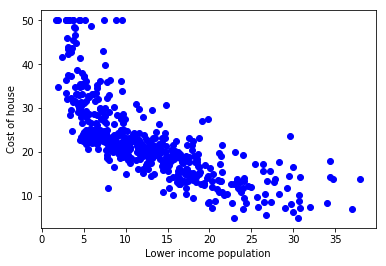

In [22]:
#Ensuring matplotlib is working
#### Using LSTAT attribute (% lower status of the population) as data
#### Using MEDV  attribute (Median value of owner-occupied homes in 1000s) as target
plt.scatter(data,target,color="blue")
plt.xlabel('Lower income population')
plt.ylabel('Cost of house')
plt.show()

In [27]:
#Regression
from sklearn.linear_model import LinearRegression

#Creating a regression model
reg = LinearRegression()

#Fit the model
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
pred = reg.predict(data)

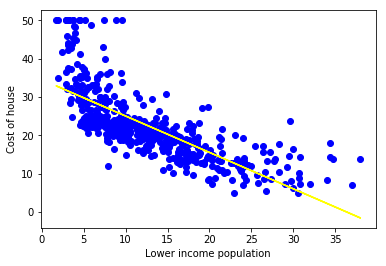

In [31]:
#Plotting the regression line
#Ensuring matplotlib is working
plt.scatter(data,target,color="blue")
plt.plot(data,pred,color="yellow")
plt.xlabel('Lower income population')
plt.ylabel('Cost of house')
plt.show()

In [32]:
#Circumventing curve line using polynomial model
from sklearn.preprocessing import PolynomialFeatures

# To allow merging of models
from sklearn.pipeline import make_pipeline

In [33]:
#Final model
model = make_pipeline(PolynomialFeatures(3),reg)

In [34]:
model.fit(data,target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [35]:
pred = model.predict(data)

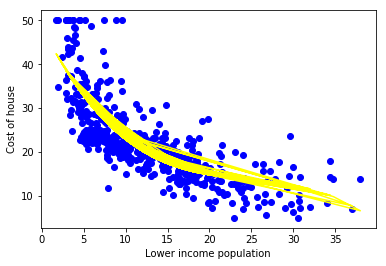

In [36]:
plt.scatter(data,target,color="blue")
plt.plot(data,pred,color="yellow")
plt.xlabel('Lower income population')
plt.ylabel('Cost of house')
plt.show()

In [37]:
# importing r_2 metric
from sklearn.metrics import r2_score

In [38]:
# predict
r2_score(pred,target)

0.4798911810275662